In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

In [115]:
"""
Esta parte te la puedes saltar, era porque el formato
del archivo estaba raro
"""
data = pd.read_csv("head6.txt")
data.columns
columns = [4,8,16,32,64, "type"]

df = []
for row,d in data.iterrows():
    row = d.values[0].split()[1:]
    df.append(row)
df = pd.DataFrame(df)
df.columns = columns

In [116]:
"""
Acá es donde se hace la magia, creas una nuevo dataframe
con las variables iops, type y variable (no se como se llama esta)
"""
df_merged = []
for column in df.columns:
    if column != "type": #Por cada columna que no es test creas un dataframe nuevo, forzando la columna "variable"
        iops = df.loc[:,column]
        t = df.loc[:,"type"]
        df_column = pd.DataFrame({"iops":iops, "type":type, "variable": column}) 
        df_merged.append(df_column)
df_merged = pd.concat(df_merged) #Concatenas todo y paff un dataframe 

In [117]:
"""
Esto también te lo saltas, era solo para probar
"""
df_merged2 = df_merged.copy()
df_merged2["type"] = "Testo"

In [118]:
"""
Acá el problema me salia que era todo string, por lo que castié las cosas 
a su debida clase
"""
df_final_form = pd.concat([df_merged,df_merged2])
df_final_form["type"] = df_final_form.type.astype("category")
df_final_form["variable"] = df_final_form.variable.astype("int")
df_final_form["iops"] = df_final_form.iops.astype("int")

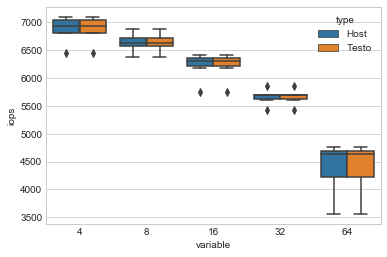

In [119]:
sns.boxplot(data=df_final_form,x="variable", y="iops", hue="type")